In [1]:
import spotipy
import os
import pandas as pd

In [2]:
os.environ['SPOTIPY_CLIENT_ID'] = '00b7317977ad4c0d971af8274f1aa790'
os.environ['SPOTIPY_CLIENT_SECRET'] = '6efbf45fe72d435f9739d0c0f4c26db5'
os.environ['SPOTIPY_REDIRECT_URI'] = 'https://360i.com/'
base_url = 'https://api.spotify.com'
scope = 'playlist-read-private'
# spotify:playlist:
rap_caviar = '37i9dQZF1DX0XUsuxWHRQd'
token = spotipy.util.prompt_for_user_token('Puffer Fish',
                           scope=scope,
                           client_id=os.environ['SPOTIPY_CLIENT_ID'],
                           client_secret=os.environ['SPOTIPY_CLIENT_SECRET'],
                           redirect_uri=os.environ['SPOTIPY_REDIRECT_URI'])
spotify = spotipy.Spotify(auth=token)

The items to retreive are:
- Track:
    - name
    - popularity
    - duration_ms
    - artist_name

- Artist:
    - id
    - name
    - popularity
    - followers




In [3]:
# Retreiving the above mentioned items from the rap_caviar playlist
playlist = spotify.playlist_tracks(playlist_id= rap_caviar,fields='items(track(id,name,popularity,duration_ms,artists(name,id)))')

In [4]:
# Turning it into a dataframe
track =pd.DataFrame()
for song in playlist['items']:
    track = track.append(song['track'],ignore_index=True)

In [5]:
track.head()

,artists,duration_ms,id,name,popularity
0,"[{'id': '4Ga1P7PMIsmqEZqhYZQgDo', 'name': 'Lil...",190344.0,21AJQhGZpujjZQXByZAXpr,REPEAT IT (with Gunna),71.0
1,"[{'id': '6EPlBSH2RSiettczlz7ihV', 'name': 'Sle...",123986.0,4XvcHTUfIlWfyJTRG0aqlo,2055,84.0
2,"[{'id': '1tG7s7S4sq2eFFW0QZyLbm', 'name': 'She...",180805.0,3Ho13bRS28xEvGvgW4LOFM,On Go (feat. Polo G),74.0
3,"[{'id': '6jeg7JBX9J9097esK752iR', 'name': 'Smi...",153406.0,3yaYgjEFkRw3PVjW9mV1TO,Over The Top (feat. Drake),82.0
4,"[{'id': '7jVv8c5Fj3E9VhNjxT4snq', 'name': 'Lil...",212000.0,27NovPIUIRrOZoCHxABJwK,INDUSTRY BABY (feat. Jack Harlow),95.0


In [6]:
# Creating a new feature with the name of the first artist
track['artist_name'] = track['artists'].apply(lambda row : row[0]['name'])
track.head()

,artists,duration_ms,id,name,popularity,artist_name
0,"[{'id': '4Ga1P7PMIsmqEZqhYZQgDo', 'name': 'Lil...",190344.0,21AJQhGZpujjZQXByZAXpr,REPEAT IT (with Gunna),71.0,Lil Tecca
1,"[{'id': '6EPlBSH2RSiettczlz7ihV', 'name': 'Sle...",123986.0,4XvcHTUfIlWfyJTRG0aqlo,2055,84.0,Sleepy Hallow
2,"[{'id': '1tG7s7S4sq2eFFW0QZyLbm', 'name': 'She...",180805.0,3Ho13bRS28xEvGvgW4LOFM,On Go (feat. Polo G),74.0,Sheff G
3,"[{'id': '6jeg7JBX9J9097esK752iR', 'name': 'Smi...",153406.0,3yaYgjEFkRw3PVjW9mV1TO,Over The Top (feat. Drake),82.0,Smiley
4,"[{'id': '7jVv8c5Fj3E9VhNjxT4snq', 'name': 'Lil...",212000.0,27NovPIUIRrOZoCHxABJwK,INDUSTRY BABY (feat. Jack Harlow),95.0,Lil Nas X


Here, we will create a loop to grab all the artists' ids that appear in all the tracks on our playlist, keeping in mind that some songs have more than one artist:

In [7]:
artist_ids = list()
for artists in track['artists']:
    for artist in artists:
        artist_ids.append(artist['id'])

Here, we iterate over our list of ids and use our Spotify API to extract all the information for each artist associated to that each id:

In [8]:
singers = pd.DataFrame()
for id in artist_ids:
    artist = spotify.artist(artist_id = id)
    
    singers=singers.append(artist,ignore_index=True)

Since our dataframe contains a bunch of values we do not care about, let's select only the columns we want:

In [9]:
singers = singers[['id','name','followers','popularity']]
singers

,id,name,followers,popularity
0,4Ga1P7PMIsmqEZqhYZQgDo,Lil Tecca,"{'href': None, 'total': 3996918}",83.0
1,2hlmm7s2ICUX0LVIhVFlZQ,Gunna,"{'href': None, 'total': 3324681}",90.0
2,6EPlBSH2RSiettczlz7ihV,Sleepy Hallow,"{'href': None, 'total': 399412}",83.0
3,1tG7s7S4sq2eFFW0QZyLbm,Sheff G,"{'href': None, 'total': 425708}",77.0
4,6AgTAQt8XS6jRWi4sX7w49,Polo G,"{'href': None, 'total': 4808778}",93.0
...,...,...,...,...
98,6aaMZ3fcfLv4tEbmY7bjRM,Isaiah Rashad,"{'href': None, 'total': 943802}",80.0
99,4O15NlyKLIASxsJ0PrXPfz,Lil Uzi Vert,"{'href': None, 'total': 11798270}",91.0
100,65smG2lgnRmrDB8g7z1hG0,Paper Route EMPIRE,"{'href': None, 'total': 1990}",65.0
101,0RESbWvOMyua0yuyVrztJ5,Key Glock,"{'href': None, 'total': 901802}",76.0


Our variable `followers` needs to be fixed:

In [10]:
singers['followers'] = singers['followers'].apply(lambda row : row['total'])
singers.head()

,id,name,followers,popularity
0,4Ga1P7PMIsmqEZqhYZQgDo,Lil Tecca,3996918,83.0
1,2hlmm7s2ICUX0LVIhVFlZQ,Gunna,3324681,90.0
2,6EPlBSH2RSiettczlz7ihV,Sleepy Hallow,399412,83.0
3,1tG7s7S4sq2eFFW0QZyLbm,Sheff G,425708,77.0
4,6AgTAQt8XS6jRWi4sX7w49,Polo G,4808778,93.0


Check for duplicates:

In [11]:
singers[singers.duplicated()].head()

,id,name,followers,popularity
14,6AgTAQt8XS6jRWi4sX7w49,Polo G,4808778,93.0
16,2LIk90788K0zvyj2JJVwkJ,Jack Harlow,1038620,88.0
22,5f7VJjfbwm532GiveGC0ZK,Lil Baby,7772579,94.0
23,3hcs9uc56yIGFCSy9leWe7,Lil Durk,2812403,89.0
25,2hlmm7s2ICUX0LVIhVFlZQ,Gunna,3324681,90.0


Drop duplicates:

In [12]:
singers.drop_duplicates(inplace=True)

In [13]:
# Pipeline to accomplish the same thing we have accomplished above
def get_tracks(id):
    playlist = spotify.playlist_tracks(playlist_id= id,fields='items(track(id,name,popularity,duration_ms,artists(name,id)))')
    track =pd.DataFrame()
    for song in playlist['items']:
        track = track.append(song['track'],ignore_index=True)
        track['artist_name'] = track['artists'].apply(lambda row : row[0]['name'])
        artist_ids = list()
    for artists in track['artists']:
        for artist in artists:
            artist_ids.append(artist['id'])
    singers = pd.DataFrame()
    for ids in artist_ids:
        artist = spotify.artist(artist_id = ids)
        singers=singers.append(artist,ignore_index=True)
        singers = singers[['id','name','followers','popularity']]
        singers.drop_duplicates(inplace=True)
    return track, singers

# Creating Database

In [14]:
import sqlite3

In [15]:
con = sqlite3.connect('spotify.db')
cur = con.cursor()

# Create table tracks
cur.execute('''CREATE TABLE IF NOT EXISTS tracks
               (name VARCHAR, popularity INTEGER, duration_ms INTEGER, artist_name VARCHAR)''')


# Insert a row of data into tracks
track[['name','popularity', 'duration_ms', 'artist_name']].to_sql(name='tracks', con=con, if_exists='append', index=False)


# Create table artists
cur.execute('''CREATE TABLE IF NOT EXISTS artists
                 (id VARCHAR, name VARCHAR, popularity INTEGER, followers INTEGER)''')

# Insert a row of data into artists
singers[['id','name','popularity', 'followers']].to_sql(name='artists', con=con, if_exists='append', index=False)


con.commit()

In [16]:
# Pipeline to upload data to sql database. If we wanted to change or add more variables, we'd need to add them. 
def sql_upload(track, singers):
    con = sqlite3.connect('spotify.db')
    cur = con.cursor()

    # Create table tracks
    cur.execute('''CREATE TABLE IF NOT EXISTS tracks
                   (name VARCHAR, popularity INTEGER, duration_ms INTEGER, artist_name VARCHAR)''')


    # Insert a row of data into tracks
    track[['name','popularity', 'duration_ms', 'artist_name']].to_sql(name='tracks', con=con, if_exists='append', index=False)


    # Create table artists
    cur.execute('''CREATE TABLE IF NOT EXISTS artists
                     (id VARCHAR, name VARCHAR, popularity INTEGER, followers INTEGER)''')

    # Insert a row of data into artists
    singers[['id','name','popularity', 'followers']].to_sql(name='artists', con=con, if_exists='append', index=False)


    con.commit()
    con.close()

# Analysis
Basic questions:
- How many songs are in the playlist?


In [17]:
print(f'There are {len(track)} songs in the playlist')

There are 50 songs in the playlist


In [18]:
# Reading directly from database:
print(f"There are {cur.execute('select count(*) from tracks').fetchall()} songs in the playlist")

There are [(50,)] songs in the playlist


- What are the top 5 tracks by artist follower count?

In [19]:
# I am not sure I understand this question. What happens if the same artist has more than one song? Should it consider popularity? Also, there are artists that are in a song, but they don't have a song of their own
# (since I took the first artist name from each track)
# I will approach this question as follows: I will find the top 5 artists that are present in the tracks table based on follower count, and from those 5, I will find the top 5 songs of said artists based on popularity.
#This might return more than one song for the same artist.

track[track.artist_name.isin(singers[singers.name.isin(track.artist_name.tolist())].sort_values(by='followers',ascending=False).name.head(5).tolist())].sort_values(by='popularity', ascending=False).name.head(5).tolist()

['Motley Crew',
 'Wants and Needs (feat. Lil Baby)',
 'm y . l i f e (with 21 Savage & Morray)',
 'Having Our Way (feat. Drake)',
 'Modern Day']

In [20]:
# Reading directly from database
print(cur.execute('SELECT name from tracks WHERE artist_name IN (Select name FROM artists WHERE name IN (SELECT artist_name FROM tracks) ORDER BY followers DESC LIMIT 5) ORDER BY popularity DESC LIMIT 5').fetchall())

[('Motley Crew',), ('Wants and Needs (feat. Lil Baby)',), ('m y . l i f e (with 21 Savage & Morray)',), ('Having Our Way (feat. Drake)',), ('Modern Day',)]


- Which song is the longest?


In [21]:
track.sort_values(by='duration_ms', ascending=False).name.head(1).tolist()

['Seeing Green (with Drake & Lil Wayne)']

In [22]:
# Reading directly from database
print(cur.execute('SELECT name FROM tracks ORDER BY duration_ms DESC LIMIT 1').fetchall())

[('Seeing Green (with Drake & Lil Wayne)',)]


- What is the relationship between track and artist popularity?

In [23]:
df = pd.read_sql_query("SELECT t.name, t.artist_name, t.popularity, a.followers, a.popularity as artist_popularity FROM tracks as t INNER JOIN artists as a ON a.name = t.artist_name", con)

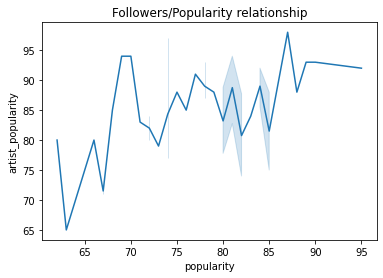

In [24]:
import seaborn as sns
sns.lineplot(data=df, y=df.artist_popularity, x=df.popularity).set_title('Followers/Popularity relationship');

In [25]:
# Pearson correlation
df.corr()

,popularity,followers,artist_popularity
popularity,1.000000,0.297221,0.438104
followers,0.297221,1.000000,0.504729
artist_popularity,0.438104,0.504729,1.000000


We see some correlation between a popularity of a song and the popularity of a singer. I believe this is due to the fact that we took the first name from songs where there were more than one artists. The popularity of one song might be directly correlated to the second person that might be more famous. This can be solved by linking the name of the singer with the most followers to any song they have been a part of, this way we would always have the most popular singer associated to a song.

Extra questions:

Due to traveling, I will not have time to answer these questions, but I will attempt to describe how I would tackle them:
- Add additional fields to the tables of your choosing
    - The fields I would add are: 
        - For tracks: release_date (I would expect to see a relationship with popularity, we will see how time affects its rating), number_of_markets (here we could see if there is any relationship with the popularity of a song based on how many countries the song is available. We could also see if an artist's follower count is affected by this as well), number_of_artists (here we could see if having more than one artist in the song affects its popularity). 
        - For artists: genres (here we could get a rough idea of the popularity of each genre based on the artist's popularity), number_of_genres (here we could see if the number of genres is correlated to the number of followers and/or popularity)
- Pick another playlist and add to the track and artist tables.
    - Here I would find more playlist ids and run it through the pipeline, appending it to the existing dataframes containing our rap_caviar data. Our pipeline would make this extremily easy. Most likely I would have picked Salsa playlists, since that's all I listen to.
- Compare features across playlists
  - I would compare popularity of songs and artists based on their genres, keeping in mind the number of countries these songs are available. I would also like to see how popular artists from back in the day are regarded nowadays.
- What features are predictive of track popularity?
 - To answer this I would have to actually work on what I have stated above. I believe looking at the pearson correlation of all numeric variables against track popularity will tell us what are the variables that determine it's popularity. Without doing it, I can only speculate.
 
I can happily adress these questions when I return on August 16th


In [26]:
con.close()